In [1]:
import os

In [2]:
os.getcwd()

'D:\\idea projects\\pycharm projects\\ature\\notebook'

In [3]:
os.chdir("D:\\idea projects\\pycharm projects\\ature\\")

In [4]:
import preprocess.av.av_utils as av
from preprocess.common.mat_utils import Mat
import preprocess.filter.image_filters as imf
import preprocess.graph.graph_utils as gt
import preprocess.image.image_utils as img
import matplotlib.pyplot as plt

In [12]:
file = Mat(file_name='wide_image_06.mat')

In [13]:
image_array = file.get_image('I2')

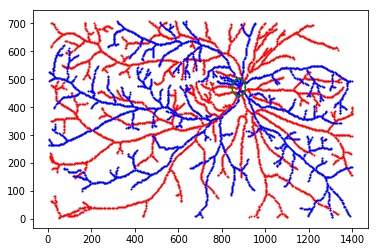

In [16]:
av.show_av_graph(av_data_set=file,av_only=False,onh_show=True,image_show=False)

In [17]:
import preprocess.filter.image_filters as fil

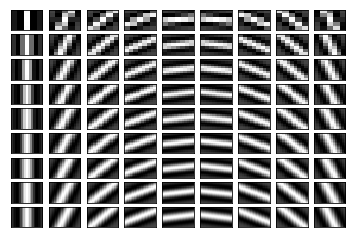

In [19]:
kernels = fil.build_filter_bank(k_size_start=4, k_size_end=21, k_step=2, gamma=0.1)
fil.show_kernels(kernels=kernels, save_fig=False)

In [10]:
final_arr = fil.process(255-image_array[:,:,1], kernels)

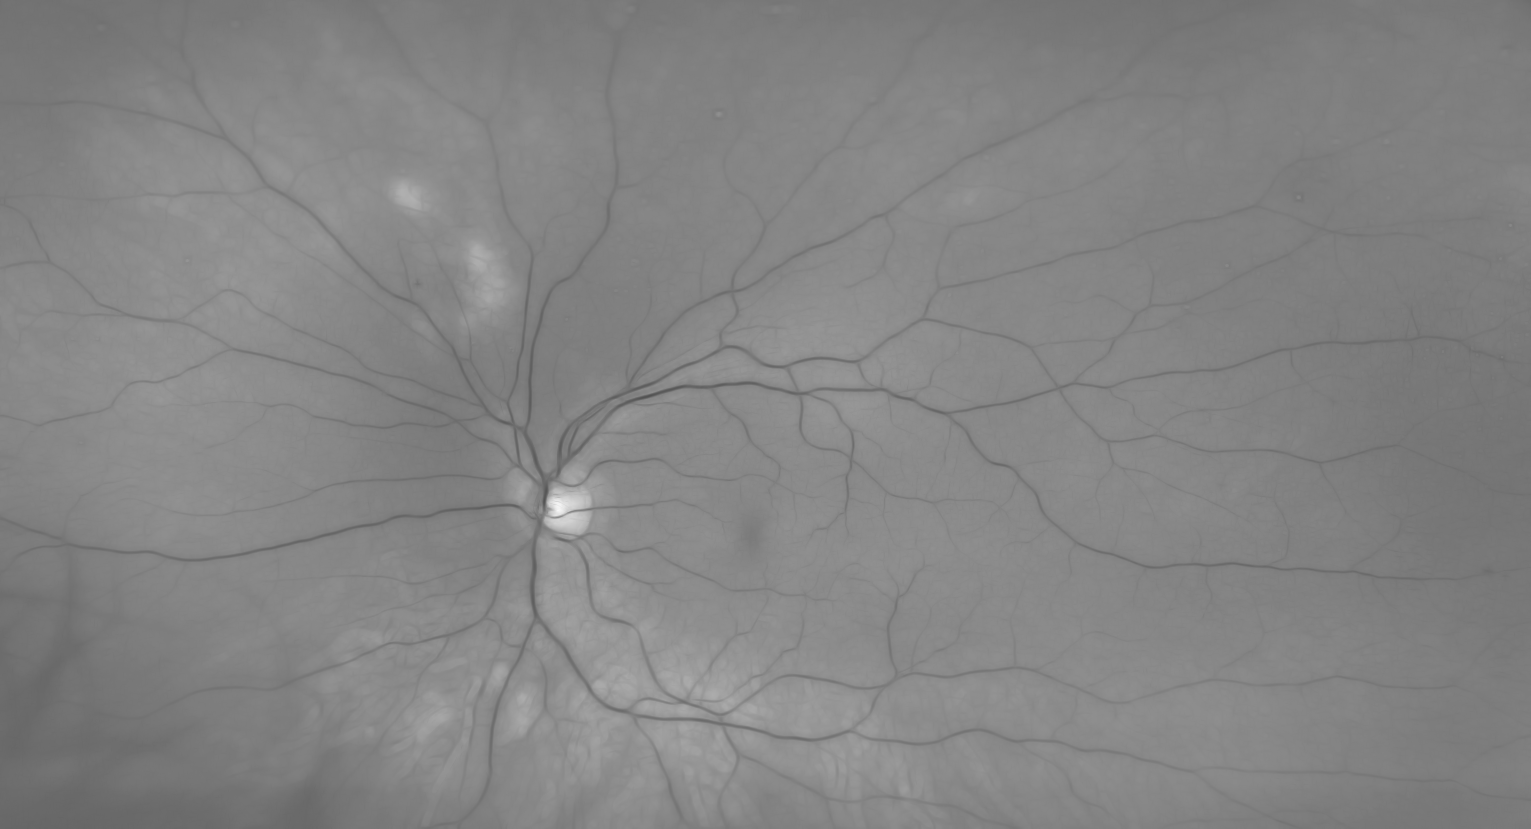